Ensure requirements are installed

In [1]:
!pip install -r ../requirements.txt

Import modules

In [2]:
from doctr.models import ocr_predictor
from doctr.models import detection_predictor
from doctr.io import DocumentFile
import cv2
import numpy as np
import matplotlib.pyplot as plt

/Users/thomaschamberlain/Projects/OCR/ocr_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Preprocess Image

In [39]:
img = cv2.imread('../data/raw/test_img.png', 0)

img = cv2.imread('../data/raw/test_img.png', 0)
_, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


In [48]:
adaptive_thresh_img = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

In [49]:
cv2.imwrite('../data/processed/adaptive_thresh_image.png', adaptive_thresh_img)

True

# Text Detection

In [41]:
# Load OCR model
model = ocr_predictor(pretrained=True, assume_straight_pages=True)

/Users/thomaschamberlain/Projects/OCR/ocr_env/lib/python3.12/site-packages/doctr/models/utils/pytorch.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch

In [52]:
# Load the document (image or PDF)
doc_path = '../data/processed/adaptive_thresh_image.png'  
doc = DocumentFile.from_images(doc_path)  


# doc = DocumentFile.from_pdf('../data/raw/test.pdf')
# doc = DocumentFile.from_pdf("../data/raw/book_image.pdf")

In [53]:
# Perform OCR
result = model(doc)

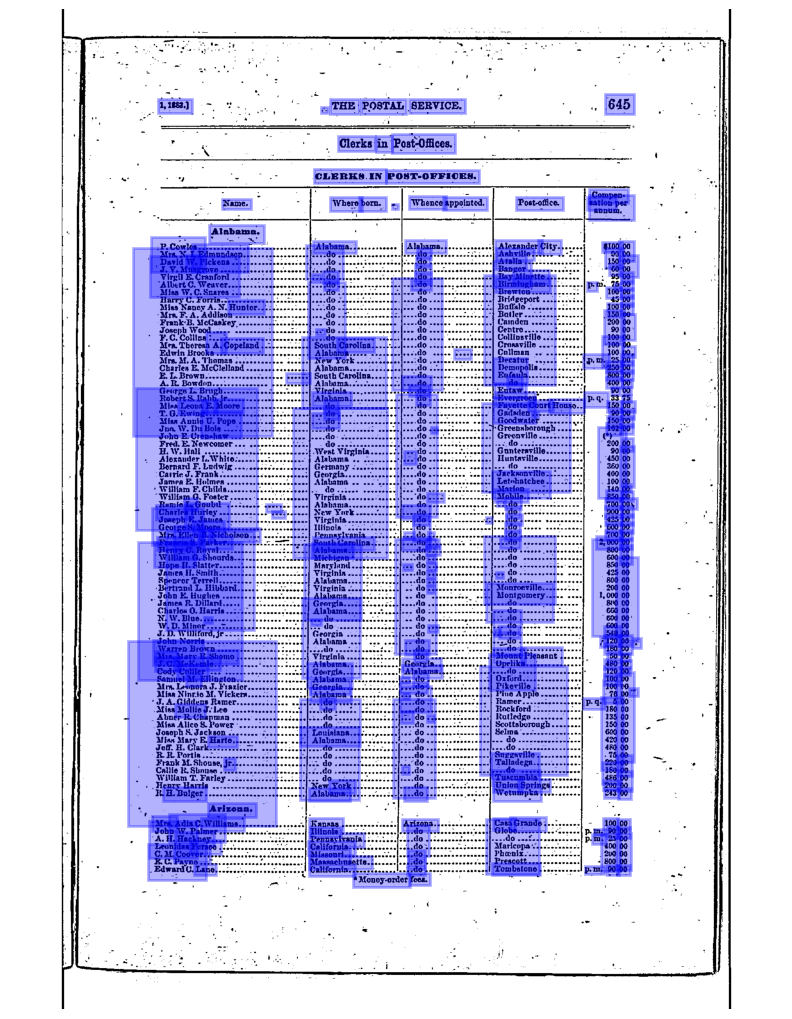

In [54]:
# Visualize the extracted document structure
result.show()

In [55]:
# Print raw OCR output
json_output = result.export()
json_output

{'pages': [{'page_idx': 0,
   'dimensions': (2200, 1700),
   'orientation': {'value': None, 'confidence': None},
   'language': {'value': None, 'confidence': None},
   'blocks': [{'geometry': ((np.float64(0.15245863970588236),
       np.float64(0.0849609375)),
      (np.float64(0.8159466911764706), np.float64(0.8779296875))),
     'objectness_score': 0.6648982380399641,
     'lines': [{'geometry': ((np.float64(0.19163602941176472),
         np.float64(0.08984375)),
        (np.float64(0.23586856617647056), np.float64(0.103515625))),
       'objectness_score': 0.7068977355957031,
       'words': [{'value': '1,1853.)',
         'confidence': 0.33133554458618164,
         'geometry': ((np.float64(0.19163602941176472),
           np.float64(0.08984375)),
          (np.float64(0.23586856617647056), np.float64(0.103515625))),
         'objectness_score': 0.7068977355957031,
         'crop_orientation': {'value': 0, 'confidence': None}}]},
      {'geometry': ((np.float64(0.4026884191176471), 

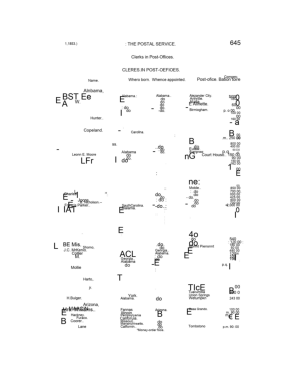

In [56]:
synthetic_pages = result.synthesize()
plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()